In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [3]:
# Format floats to show regular numbers with commas and no decimal places
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
### Load the dataset
df_OHE = pd.read_csv("data_OHE.csv")
df_Hybrid = pd.read_csv("Hybrid_Encoding.csv")

### splitting the data

In [5]:
from sklearn.model_selection import train_test_split


In [6]:
# the OHE dataset
X1 = df_OHE.drop("Price", axis=1)
y1 = df_OHE["Price"]

# the Hybrid Encoding dataset

X2 = df_Hybrid.drop("Price", axis=1)
y2 = df_Hybrid["Price"]

In [7]:
# the OHE dataset split
X1_train, X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state = 42 )  
  
# the Hybrid Encoding dataset split
X2_train, X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 42 )

In [8]:
# making the Log Transformation set for the Hybrid Encoding dataset
y2_train_log = np.log1p(y2_train)
y2_test_log = np.log1p(y2_test)
# making the Log Transformation set for the OHE dataset
y1_train_log = np.log1p(y1_train)
y1_test_log = np.log1p(y1_test)

In [9]:
# a helper function to evaluate regression models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, X_train, y_train, model_name):
    """
    Evaluates a regression model using MAE, RMSE, and R2 Score.
    Plots Actual vs. Predicted values.
    """
    
    # 1. Make Predictions
    y_pred = model.predict(X_test)
    
    print(f"\n--- Evaluation for {model_name} ---\n")

    # 2. Calculate Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    # 3. Print Results
    print("Training Score: ", model.score(X_train, y_train))
    print(f"R² Score (Accuracy):  {r2:.2%}") # Closer to 100% is better
    print(f"MAE (Avg Error):      {mae:,.0f} TL") # On average, how wrong are we?
    print(f"RMSE (Large Error):   {rmse:,.0f} TL") # Penalizes huge mistakes more
    
    # 4. Visual Evaluation: Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    
    # Scatter plot of data points
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='coral', edgecolor='k', s=50)
    
    # The "Perfect Prediction" Line (Diagonal)
    # If a point is on this line, the prediction was 100% correct
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', linewidth=2, label='Perfect Prediction')

    plt.title(f'{model_name}: Actual Prices vs Predicted Prices', fontsize=14, fontweight='bold')
    plt.xlabel('Actual Price (True Value)', fontsize=12)
    plt.ylabel('Predicted Price (Model Guess)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Use log scale if your prices have a huge range (optional, but recommended for Real Estate)
    plt.xscale('log')
    plt.yscale('log')
    
    plt.show()

# Example Usage:
# evaluate_regression(rf_model, X_test, y_test, "Random Forest")

# Model training using defult parameters


### **Random Forest**

* **Using OHE**

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf_model_OHE = RandomForestRegressor(n_estimators=100, random_state=42) # used 300 trees so i get better results

In [12]:
rf_model_OHE.fit(X1_train, y1_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
y1_pred = rf_model_OHE.predict(X1_test)

rf_model_OHE.score(X1_train, y1_train)

0.9492175870019693


--- Evaluation for Random Forest Regressor on OHE Dataset ---

Training Score:  0.9492175870019693
R² Score (Accuracy):  62.29%
MAE (Avg Error):      883,166 TL
RMSE (Large Error):   1,800,649 TL


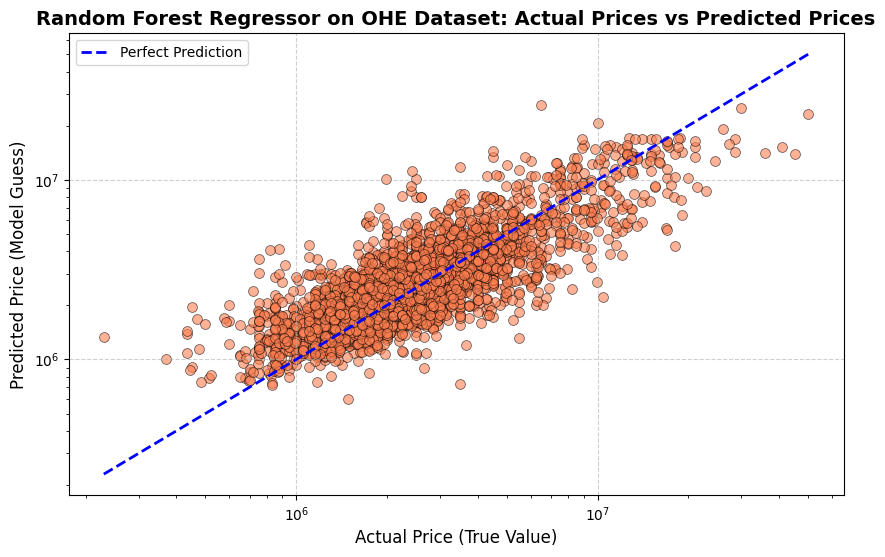

In [14]:
evaluate_model(rf_model_OHE, X1_test, y1_test, X1_train, y1_train, "Random Forest Regressor on OHE Dataset")

**--- Evaluation for Random Forest Regressor on OHE Dataset ---**

* **This is the values using 300 tree**

    R² Score (Accuracy):  62.61%

    MAE (Avg Error):      879,770 TL

    RMSE (Large Error):   1,793,172 TL

* **This is the values using 100 tree**


    R² Score (Accuracy):  62.29%

    MAE (Avg Error):      883,166 TL

    RMSE (Large Error):   1,800,649 TL

* **Using Hybird**


In [15]:
rf_model_Hy = RandomForestRegressor(n_estimators=300, random_state=42) 

In [16]:
rf_model_Hy.fit(X2_train, y2_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
y2_pred = rf_model_Hy.predict(X2_test)

rf_model_Hy.score(X2_train, y2_train)

0.9500757579739483


--- Evaluation for Random Forest Regressor on Hybrid Dataset ---

Training Score:  0.9500757579739483
R² Score (Accuracy):  62.38%
MAE (Avg Error):      883,570 TL
RMSE (Large Error):   1,798,656 TL


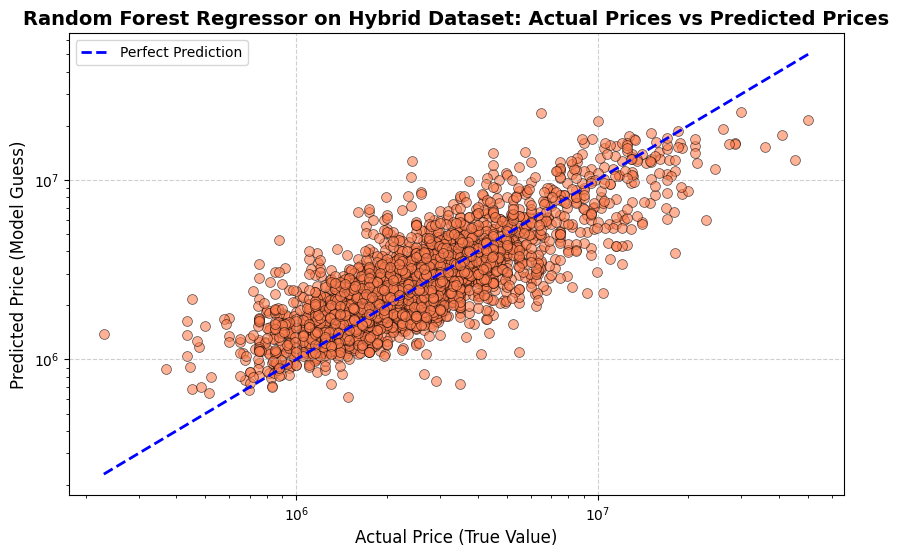

In [18]:
evaluate_model(rf_model_Hy, X2_test, y2_test, X2_train, y2_train, "Random Forest Regressor on Hybrid Dataset")


**--- Evaluation for Random Forest Regressor on Hybird Dataset ---**




* **This is the values using 300 tree**

R² Score (Accuracy):  62.38%

MAE (Avg Error):      883,570 TL

RMSE (Large Error):   1,798,656 TL

* **This is the values using 100 tree**

Training score : 0.9498110572938573

R² Score (Accuracy):  62.15%

MAE (Avg Error):      887,256 TL

RMSE (Large Error):   1,804,102 TL





In [19]:

def plot_actual_vs_predicted(y_test, y_pred):

    # 1. Create a DataFrame to compare the values side-by-side
    compare_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

    # 2. Reset index so we can plot them easily
    compare_df = compare_df.reset_index(drop=True)

    # 3. Take a sample (e.g., first 20 houses) to make the graph readable
    sample_df = compare_df.head(20)

    # 4. Plotting
    sample_df.plot(kind='bar', figsize=(16, 8))

    plt.title('Actual vs Predicted Prices (First 20 Houses)', fontsize=16)
    plt.ylabel('Price (TL)', fontsize=14)
    plt.xlabel('House Index', fontsize=14)
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()

    # 5. Display the numbers too (Optional)
    print(sample_df)

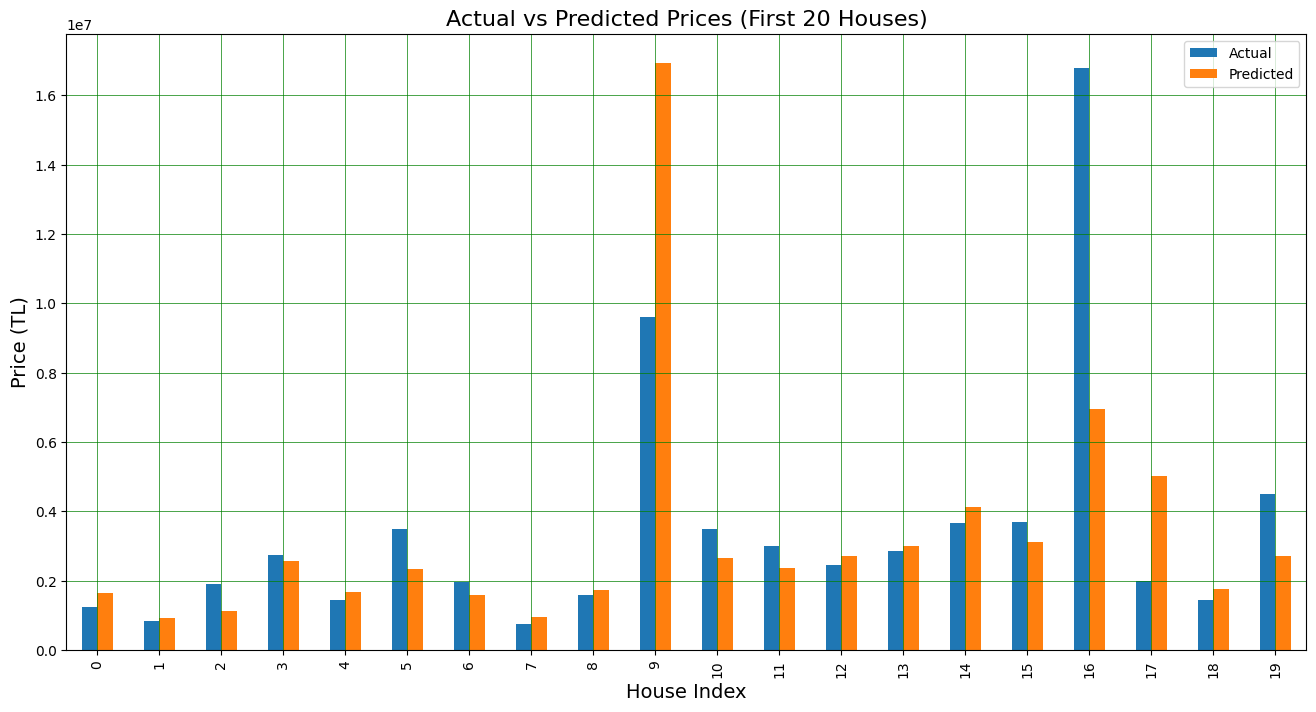

       Actual  Predicted
0   1,230,000  1,648,066
1     845,000    921,399
2   1,900,000  1,113,023
3   2,750,000  2,571,898
4   1,450,000  1,685,383
5   3,500,000  2,334,038
6   1,975,000  1,575,220
7     750,000    955,986
8   1,600,000  1,743,063
9   9,600,000 16,928,750
10  3,500,000  2,667,628
11  2,999,000  2,351,435
12  2,450,000  2,712,885
13  2,850,000  2,995,646
14  3,650,000  4,137,930
15  3,700,000  3,109,869
16 16,800,000  6,963,023
17  2,000,000  5,030,342
18  1,435,000  1,763,993
19  4,500,000  2,708,614


In [20]:
plot_actual_vs_predicted(y2_test, y2_pred)

* Note that the model is overfitting, so we will need to tune it 

## **LightGBM**

In [21]:
from lightgbm import LGBMRegressor

* **OHE**

In [22]:
lgbm_OHE = LGBMRegressor(n_estimators=100, random_state=42)

In [23]:
lgbm_OHE.fit(X1_train, y1_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 59
[LightGBM] [Info] Start training from score 3036776.437050


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [24]:
lgbm_y1_pred = lgbm_OHE.predict(X1_test)
lgbm_OHE.score(X1_train, y1_train) # train score

0.7896424933435424


--- Evaluation for LightGBM Regressor on One-Hot Encoded Dataset ---

Training Score:  0.7896424933435424
R² Score (Accuracy):  63.43%
MAE (Avg Error):      855,277 TL
RMSE (Large Error):   1,773,304 TL


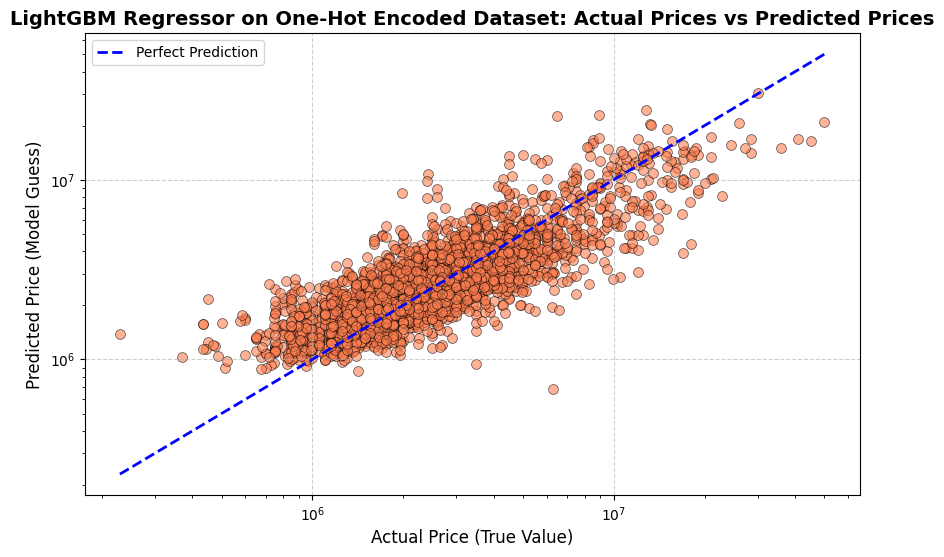

In [25]:
evaluate_model(lgbm_OHE, X1_test, y1_test,X1_train, y1_train, "LightGBM Regressor on One-Hot Encoded Dataset")

**--- Evaluation for LightGBM Regressor on One-Hot Encoded Dataset ---**

* **This is the values using 300 tree**

Training score : 0.8441107159028329

R² Score (Accuracy):  61.75%

MAE (Avg Error):      860,416 TL

RMSE (Large Error):   1,813,575 TL

* **This is the values using 100 tree**

Training score : 0.7896424933435424

R² Score (Accuracy):  63.43%

MAE (Avg Error):      855,277 TL

RMSE (Large Error):   1,773,304 TL

**Hybird**

In [26]:
lgbm_Hy = LGBMRegressor(n_estimators=300, random_state=42)

In [27]:
lgbm_Hy.fit(X2_train, y2_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 28
[LightGBM] [Info] Start training from score 3036776.437050


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [28]:
lgbm_y2_pred = lgbm_Hy.predict(X2_test)
lgbm_Hy.score(X2_train, y2_train) # train score

0.8486994563983112


--- Evaluation for LightGBM Regressor on Hybrid Dataset ---

Training Score:  0.8486994563983112
R² Score (Accuracy):  60.78%
MAE (Avg Error):      858,345 TL
RMSE (Large Error):   1,836,511 TL


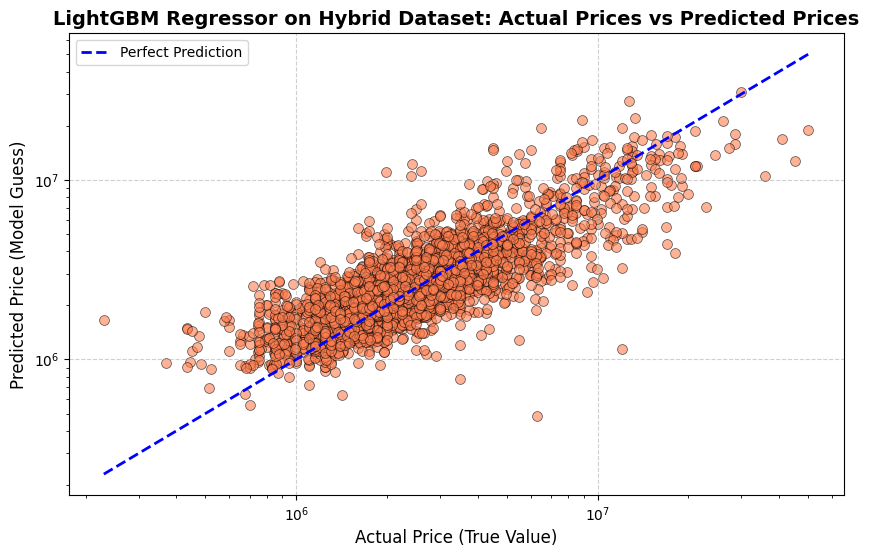

In [29]:
evaluate_model(lgbm_Hy, X2_test, y2_test,X2_train, y2_train, "LightGBM Regressor on Hybrid Dataset")

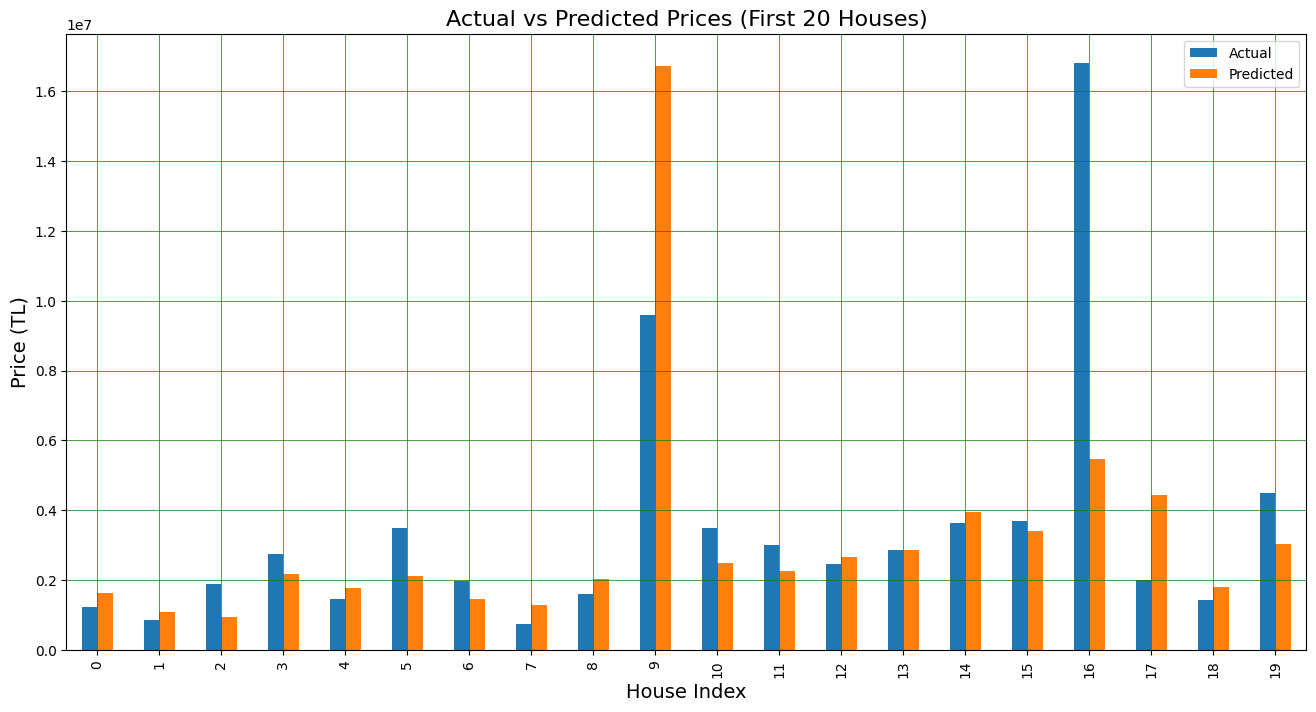

       Actual  Predicted
0   1,230,000  1,624,289
1     845,000  1,089,247
2   1,900,000    935,794
3   2,750,000  2,179,708
4   1,450,000  1,771,879
5   3,500,000  2,118,459
6   1,975,000  1,459,873
7     750,000  1,281,682
8   1,600,000  2,039,469
9   9,600,000 16,720,542
10  3,500,000  2,477,076
11  2,999,000  2,250,699
12  2,450,000  2,660,539
13  2,850,000  2,858,646
14  3,650,000  3,939,178
15  3,700,000  3,409,218
16 16,800,000  5,469,190
17  2,000,000  4,425,611
18  1,435,000  1,814,672
19  4,500,000  3,039,508


In [30]:
plot_actual_vs_predicted(y2_test, lgbm_y2_pred)

**--- Evaluation for LightGBM Regressor on Hybrid Dataset ---**

* **This is the values using 300 tree**

Training score :  0.8486994563983112

R² Score (Accuracy):  60.78%

MAE (Avg Error):      858,345 TL

RMSE (Large Error):   1,836,511 TL

* **This is the values using 100 tree**

Training score :  0.7934797943065677

R² Score (Accuracy):  63.08%

MAE (Avg Error):      853,640 TL

RMSE (Large Error):   1,781,771 TL

## CatBoost

In [31]:
from catboost import CatBoostRegressor

In [32]:
cat_data = pd.read_csv("final_cleaned_home_price_data.csv")
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Net_Area                19609 non-null  int64  
 1   Gross_Area              19609 non-null  float64
 2   Room_Count              19609 non-null  float64
 3   Floor_Location          19609 non-null  object 
 4   Building_Age            19609 non-null  object 
 5   Heating_Type            19609 non-null  object 
 6   Price                   19609 non-null  float64
 7   City                    19609 non-null  object 
 8   Occupancy_Status        19609 non-null  object 
 9   Investment_Eligibility  19609 non-null  object 
 10  Title_Deed_Status       19609 non-null  object 
 11  Bathroom_Count          19609 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.8+ MB


In [33]:
catogorial_features = ["Floor_Location","Building_Age","Heating_Type","City","Occupancy_Status","Investment_Eligibility","Title_Deed_Status"]

In [34]:
X_cat = cat_data.drop("Price", axis=1)
y_cat = cat_data["Price"]

In [35]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

In [36]:
cat_model = CatBoostRegressor(verbose=0, random_state=42)  

In [37]:
cat_model.fit(X_cat_train, y_cat_train, cat_features=catogorial_features)

In [38]:
y_cat_pred = cat_model.predict(X_cat_test)
cat_model.score(X_cat_train, y_cat_train)

np.float64(0.8351588444362967)


--- Evaluation for CatBoost Regressor on Categorical Dataset ---

Training Score:  0.8351588444362967
R² Score (Accuracy):  68.94%
MAE (Avg Error):      775,130 TL
RMSE (Large Error):   1,634,233 TL


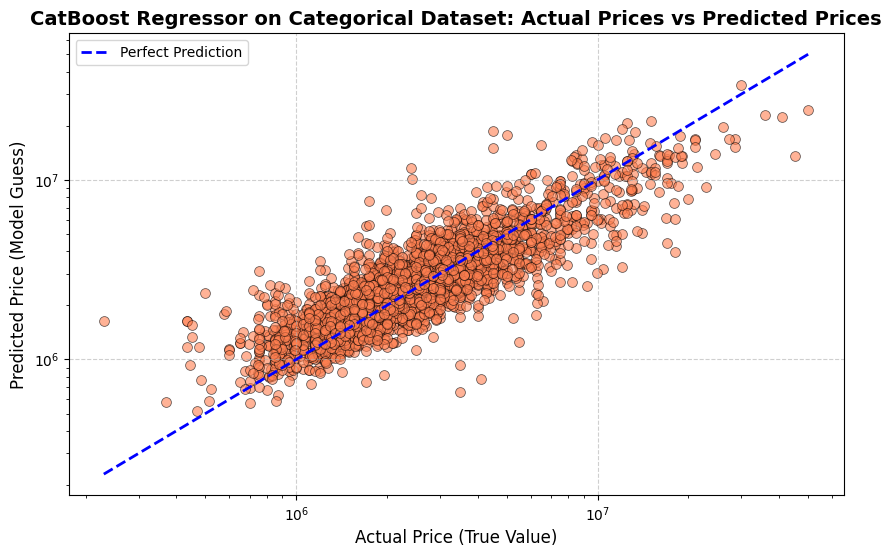

In [39]:
evaluate_model(cat_model, X_cat_test, y_cat_test,X_cat_train, y_cat_train, "CatBoost Regressor on Categorical Dataset")

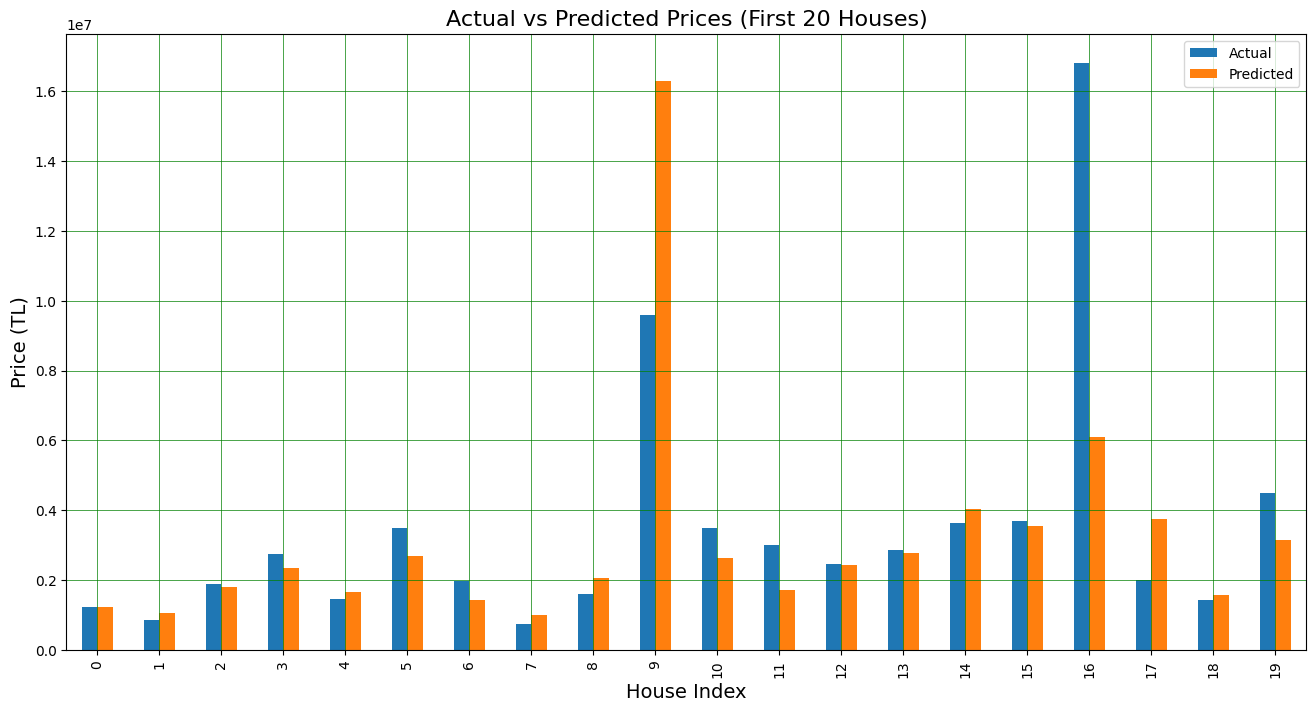

       Actual  Predicted
0   1,230,000  1,237,966
1     845,000  1,045,833
2   1,900,000  1,800,827
3   2,750,000  2,335,911
4   1,450,000  1,663,143
5   3,500,000  2,682,899
6   1,975,000  1,441,108
7     750,000    995,044
8   1,600,000  2,063,010
9   9,600,000 16,289,222
10  3,500,000  2,627,623
11  2,999,000  1,711,193
12  2,450,000  2,436,839
13  2,850,000  2,767,837
14  3,650,000  4,041,796
15  3,700,000  3,545,374
16 16,800,000  6,101,832
17  2,000,000  3,746,633
18  1,435,000  1,582,813
19  4,500,000  3,154,422


In [40]:
plot_actual_vs_predicted(y_cat_test, y_cat_pred)

In [41]:
# i will try to improve the results by using the city tiering on CatBoost

cat_data2 = pd.read_csv("city_tiered_data.csv")

In [42]:
X2_cat = cat_data2.drop("Price", axis=1)
y2_cat = cat_data2["Price"]

X2_cat_train, X2_cat_test, y2_cat_train, y2_cat_test = train_test_split(X2_cat, y2_cat, test_size=0.2, random_state=42)

In [43]:
cat_model2 = CatBoostRegressor(verbose=0, random_state=42)

In [44]:
cat_model2.fit(X2_cat_train, y2_cat_train, cat_features=catogorial_features)

In [45]:
y2_cat_pred = cat_model2.predict(X2_cat_test)
cat_model2.score(X2_cat_train, y2_cat_train)

np.float64(0.8041081670435234)


--- Evaluation for CatBoost Regressor on City Tiered Dataset ---

Training Score:  0.8041081670435234
R² Score (Accuracy):  63.88%
MAE (Avg Error):      848,794 TL
RMSE (Large Error):   1,762,376 TL


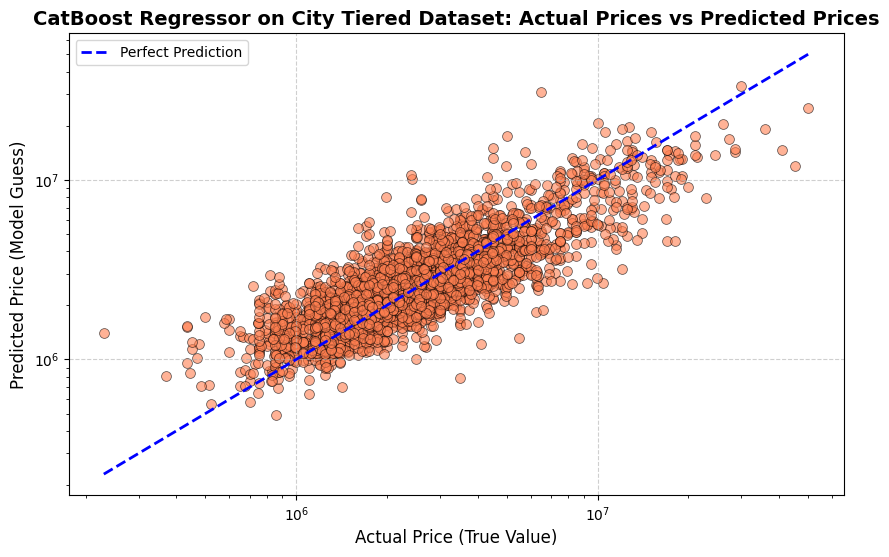

In [46]:
evaluate_model(cat_model2, X2_cat_test, y2_cat_test,X2_cat_train, y2_cat_train, "CatBoost Regressor on City Tiered Dataset")

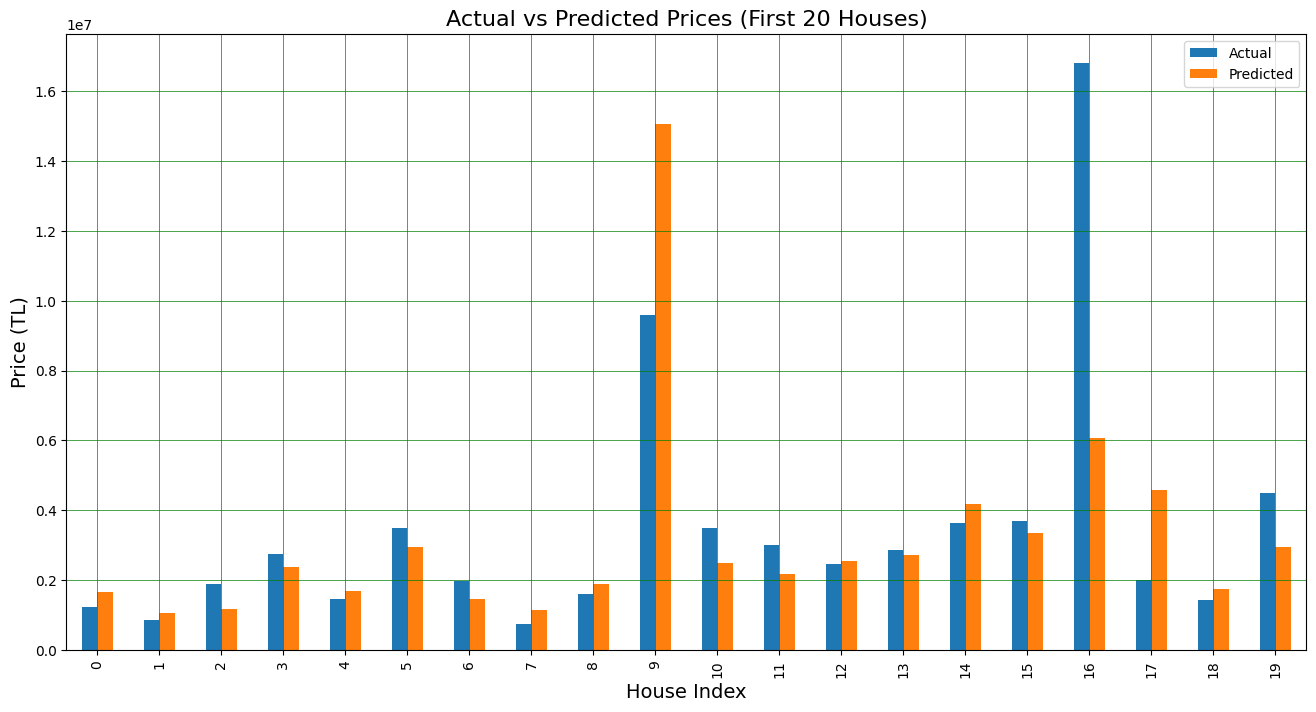

       Actual  Predicted
0   1,230,000  1,646,533
1     845,000  1,047,013
2   1,900,000  1,163,295
3   2,750,000  2,371,594
4   1,450,000  1,699,706
5   3,500,000  2,936,589
6   1,975,000  1,462,810
7     750,000  1,151,664
8   1,600,000  1,880,868
9   9,600,000 15,067,256
10  3,500,000  2,494,675
11  2,999,000  2,181,816
12  2,450,000  2,535,870
13  2,850,000  2,724,039
14  3,650,000  4,173,289
15  3,700,000  3,360,252
16 16,800,000  6,061,292
17  2,000,000  4,570,811
18  1,435,000  1,748,642
19  4,500,000  2,962,857


In [47]:
plot_actual_vs_predicted(y2_cat_test, cat_model2.predict(X2_cat_test))

In [48]:
# my initial conclusion is that the data needs more feature engineering to improve the model results
# especially handling the outliers in the price column

# With The Log transformation

* **OHE**

In [49]:

lgbm_OHE_Log = LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=31, random_state=42)
lgbm_OHE_Log.fit(X1_train, y1_train_log)
y_pred_Log = lgbm_OHE_Log.predict(X1_test)
y_pred_Log_exp = np.expm1(y_pred_Log)  # Inverse of log1p to get back to original scale




r2 = r2_score(y1_test, y_pred_Log_exp)
mae = mean_absolute_error(y1_test, y_pred_Log_exp)
rmse = np.sqrt(mean_squared_error(y1_test, y_pred_Log_exp))




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 59
[LightGBM] [Info] Start training from score 14.699217


In [50]:
# 2. Calculate the Training Score (To check Overfitting)
# We must predict on X1_train and inverse transform it first
y_train_pred_log = lgbm_OHE_Log.predict(X1_train)
y_train_pred_exp = np.expm1(y_train_pred_log)
train_r2 = r2_score(y1_train, y_train_pred_exp)

# 3. Print the Scorecard
print("-" * 30)
print("--- LightGBM (Log-Transformed) Results ---")
print("-" * 30)
print(f"Test R² Score:   {r2:.2%}  (Target: > 75%)")
print(f"Train R² Score:  {train_r2:.2%}")
print(f"Overfitting Gap: {train_r2 - r2:.2%} (Target: < 10%)")
print("-" * 30)
print(f"MAE (Avg Error): {mae:,.0f} TL")
print(f"RMSE (Big Error):{rmse:,.0f} TL")
print("-" * 30)

------------------------------
--- LightGBM (Log-Transformed) Results ---
------------------------------
Test R² Score:   63.65%  (Target: > 75%)
Train R² Score:  68.77%
Overfitting Gap: 5.12% (Target: < 10%)
------------------------------
MAE (Avg Error): 818,547 TL
RMSE (Big Error):1,767,945 TL
------------------------------


------------------------------
--- LightGBM (Log-Transformed) Results ---
------------------------------
Test R² Score:   63.65%  (Target: > 75%)
Train R² Score:  68.77%
Overfitting Gap: 5.12% (Target: < 10%)
------------------------------
MAE (Avg Error): 818,547 TL
RMSE (Big Error):1,767,945 TL
------------------------------


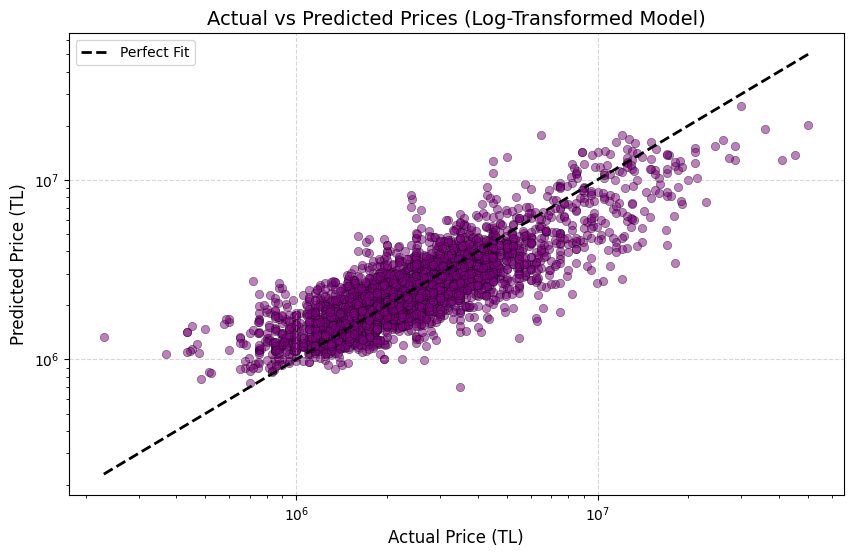

In [51]:
r2 = r2_score(y1_test, y_pred_Log_exp)
mae = mean_absolute_error(y1_test, y_pred_Log_exp)
rmse = np.sqrt(mean_squared_error(y1_test, y_pred_Log_exp))

# 2. Calculate the Training Score (To check Overfitting)
# We must predict on X1_train and inverse transform it first
y_train_pred_log = lgbm_OHE_Log.predict(X1_train)
y_train_pred_exp = np.expm1(y_train_pred_log)
train_r2 = r2_score(y1_train, y_train_pred_exp)

# 3. Print the Scorecard
print("-" * 30)
print("--- LightGBM (Log-Transformed) Results ---")
print("-" * 30)
print(f"Test R² Score:   {r2:.2%}  (Target: > 75%)")
print(f"Train R² Score:  {train_r2:.2%}")
print(f"Overfitting Gap: {train_r2 - r2:.2%} (Target: < 10%)")
print("-" * 30)
print(f"MAE (Avg Error): {mae:,.0f} TL")
print(f"RMSE (Big Error):{rmse:,.0f} TL")
print("-" * 30)

# 4. Visual Check: Actual vs Predicted Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y1_test, y=y_pred_Log_exp, alpha=0.5, color='purple', edgecolor='k')

# Add the "Perfect Prediction" Diagonal Line
min_val = min(y1_test.min(), y_pred_Log_exp.min())
max_val = max(y1_test.max(), y_pred_Log_exp.max())
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=2, label='Perfect Fit')

plt.title('Actual vs Predicted Prices (Log-Transformed Model)', fontsize=14)
plt.xlabel('Actual Price (TL)', fontsize=12)
plt.ylabel('Predicted Price (TL)', fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

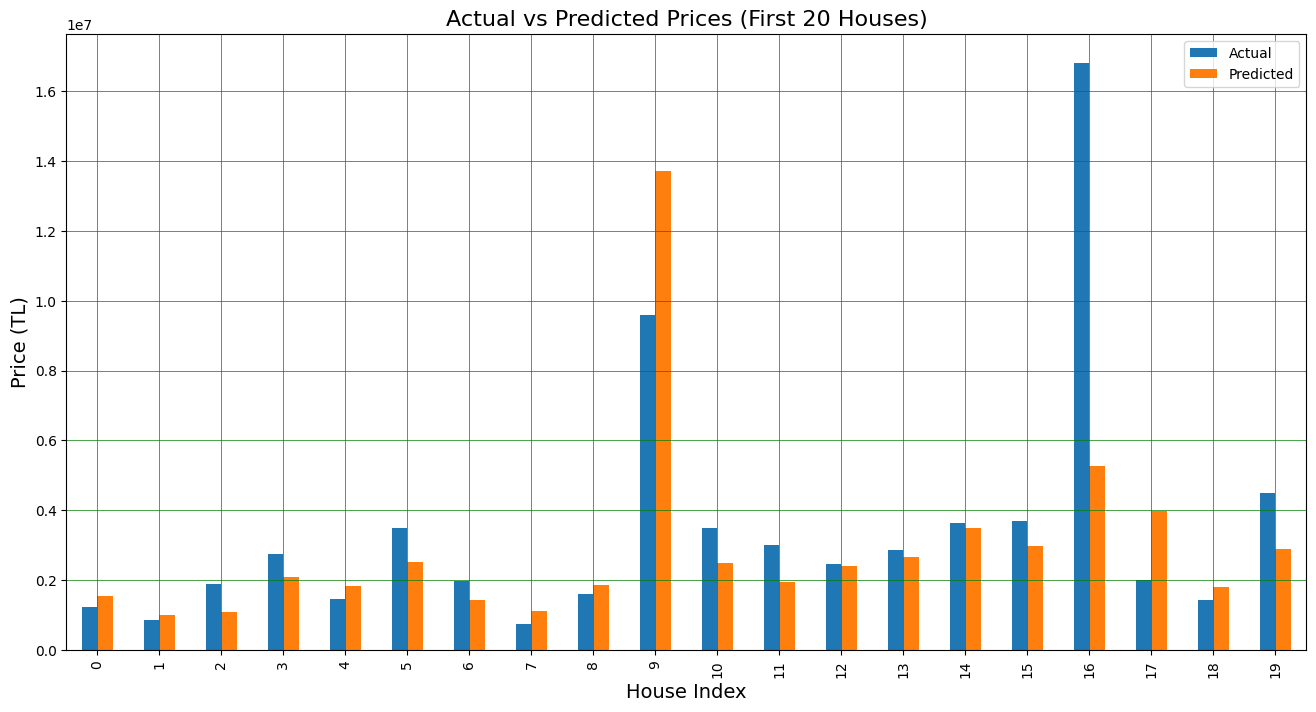

       Actual  Predicted
0   1,230,000  1,554,826
1     845,000  1,006,844
2   1,900,000  1,076,878
3   2,750,000  2,103,397
4   1,450,000  1,819,941
5   3,500,000  2,528,014
6   1,975,000  1,442,697
7     750,000  1,121,974
8   1,600,000  1,873,095
9   9,600,000 13,727,706
10  3,500,000  2,479,088
11  2,999,000  1,948,834
12  2,450,000  2,402,417
13  2,850,000  2,648,893
14  3,650,000  3,493,851
15  3,700,000  2,983,050
16 16,800,000  5,256,186
17  2,000,000  3,992,238
18  1,435,000  1,794,640
19  4,500,000  2,898,247


In [52]:
plot_actual_vs_predicted(y1_test, y_pred_Log_exp)

* **Hybird**

In [53]:

lgbm_Hybird_Log = LGBMRegressor(learning_rate=0.01, n_estimators=500, num_leaves=31, random_state=42)
lgbm_Hybird_Log.fit(X2_train, y2_train_log)
y_pred_Log2 = lgbm_Hybird_Log.predict(X2_test)
y_pred_Log2_exp = np.expm1(y_pred_Log2)  # Inverse of log1p to get back to original scale




r2 = r2_score(y2_test, y_pred_Log2_exp)
mae = mean_absolute_error(y2_test, y_pred_Log2_exp)
rmse = np.sqrt(mean_squared_error(y2_test, y_pred_Log2_exp))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 28
[LightGBM] [Info] Start training from score 14.699217


In [54]:
# 2. Calculate the Training Score (To check Overfitting)
# We must predict on X1_train and inverse transform it first
y_train_pred_log2 = lgbm_Hybird_Log.predict(X2_train)
y_train_pred_exp2 = np.expm1(y_train_pred_log2)
train_r2 = r2_score(y2_train, y_train_pred_exp2)

# 3. Print the Scorecard
print("-" * 30)
print("--- LightGBM (Log-Transformed) Results ---")
print("-" * 30)
print(f"Test R² Score:   {r2:.2%}  (Target: > 75%)")
print(f"Train R² Score:  {train_r2:.2%}")
print(f"Overfitting Gap: {train_r2 - r2:.2%} (Target: < 10%)")
print("-" * 30)
print(f"MAE (Avg Error): {mae:,.0f} TL")
print(f"RMSE (Big Error):{rmse:,.0f} TL")
print("-" * 30)

------------------------------
--- LightGBM (Log-Transformed) Results ---
------------------------------
Test R² Score:   63.00%  (Target: > 75%)
Train R² Score:  69.13%
Overfitting Gap: 6.13% (Target: < 10%)
------------------------------
MAE (Avg Error): 818,233 TL
RMSE (Big Error):1,783,637 TL
------------------------------


## Tuning

### Random Forest

In [49]:
from sklearn.model_selection import GridSearchCV


In [50]:
RF_model_grid_OHE = RandomForestRegressor(random_state=42)

In [51]:
param_grid = {
    'n_estimators': [100,200,400],        # Number of trees (More is usually better but slower)
    'max_depth': [10, 15, 20, None],       # Limit tree depth? (None = Infinite depth/Overfitting risk)
    'min_samples_split': [2, 10],      # How many samples needed to split a node?
    'min_samples_leaf': [1, 5, 10],    # CRITICAL: Minimum samples allowed in a leaf node
    'max_features': ['sqrt', 0.5]      # How many features to consider at each split
}


grid_search = GridSearchCV(
    estimator=RF_model_grid_OHE,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'  # We want to maximize the R2 Score
)

* **OHE**

In [79]:
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 0.5], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


------------------------------
Best Parameters Found:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
------------------------------
Evaluating the Tuned Model...

--- Evaluation for Tuned Random Forest ---

Training Score:  0.9167631183840377
R² Score (Accuracy):  65.37%
MAE (Avg Error):      842,398 TL
RMSE (Large Error):   1,725,681 TL


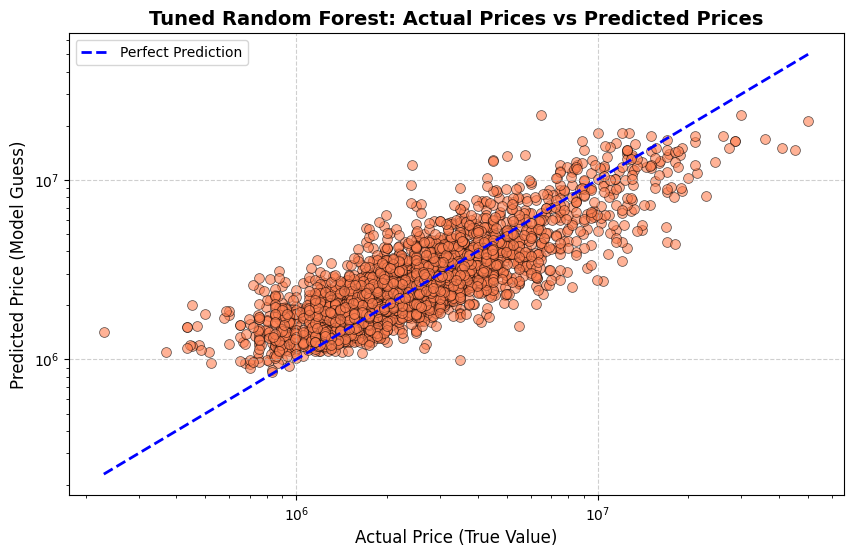

In [80]:
# Get the best model found
best_rf_OHE = grid_search.best_estimator_

print("-" * 30)
print("Best Parameters Found:")
print(grid_search.best_params_)
print("-" * 30)

# Evaluate the new "Best" model on the Test Set
print("Evaluating the Tuned Model...")
evaluate_model(best_rf_OHE, X1_test, y1_test, X1_train, y1_train, "Tuned Random Forest")

* **Hybird**

In [52]:
RF_model_grid_Hybrid = RandomForestRegressor(random_state=42)

In [54]:
param_grid = {
    'n_estimators': [100,200,400],        # Number of trees (More is usually better but slower)
    'max_depth': [10, 15, 20, None],       # Limit tree depth? (None = Infinite depth/Overfitting risk)
    'min_samples_split': [2, 10],      # How many samples needed to split a node?
    'min_samples_leaf': [1, 5, 10],    # CRITICAL: Minimum samples allowed in a leaf node
    'max_features': ['sqrt', 0.5]      # How many features to consider at each split
}


grid_search2 = GridSearchCV(
    estimator=RF_model_grid_Hybrid,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'  # We want to maximize the R2 Score
)

In [55]:
grid_search2.fit(X2_train, y2_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 0.5], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10], ...}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


------------------------------
Best Parameters Found:
{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
------------------------------
Evaluating the Tuned Model...

--- Evaluation for Tuned Random Forest ---

Training Score:  0.8941873106571957
R² Score (Accuracy):  64.78%
MAE (Avg Error):      844,127 TL
RMSE (Large Error):   1,740,138 TL


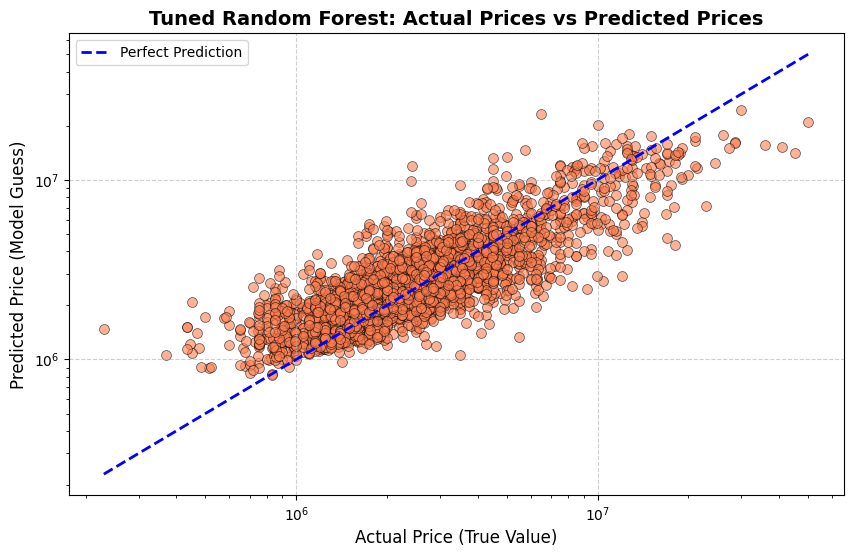

In [56]:
# Get the best model found
best_rf_Hybird = grid_search2.best_estimator_

print("-" * 30)
print("Best Parameters Found:")
print(grid_search2.best_params_)
print("-" * 30)

# Evaluate the new "Best" model on the Test Set
print("Evaluating the Tuned Model...")
evaluate_model(best_rf_Hybird, X2_test, y2_test, X2_train, y2_train, "Tuned Random Forest")

## LightGBM

* **OHE**

In [57]:
lgbm = LGBMRegressor(random_state=42, n_jobs=-1)

# 2. Define the Parameter Grid
param_grid = {
    'num_leaves': [31, 50, 70],       # Controls complexity (31 is default)
    'max_depth': [10, 15, 20],        # Limits how deep the tree can go
    'learning_rate': [0.01, 0.05, 0.1], # Speed of learning (Lower is usually better)
    'n_estimators': [500, 1000]       # Number of trees (Needs to be higher if learning_rate is low)
}

grid_search3 = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

In [58]:
grid_search3.fit(X1_train, y1_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 59
[LightGBM] [Info] Start training from score 3036776.437050
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,estimator,LGBMRegressor...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [10, 15, ...], 'n_estimators': [500, 1000], 'num_leaves': [31, 50, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [59]:
print("-" * 30)
print("Best Parameters Found:")
print(grid_search3.best_params_)
print("-" * 30)

------------------------------
Best Parameters Found:
{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 31}
------------------------------



--- Evaluation for Tuned LightGBM ---

Training Score:  0.7487222893787235
R² Score (Accuracy):  65.27%
MAE (Avg Error):      856,397 TL
RMSE (Large Error):   1,728,076 TL


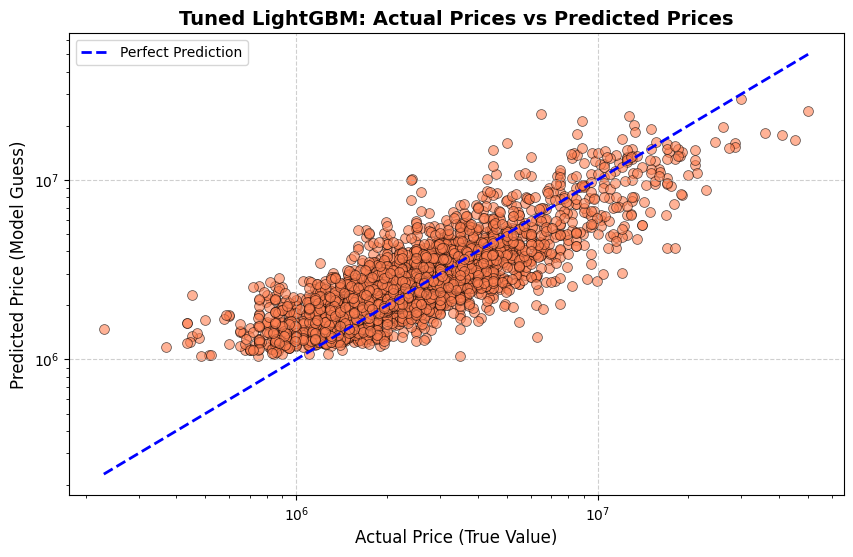

In [61]:
best_lgbm = grid_search3.best_estimator_
evaluate_model(best_lgbm, X1_test, y1_test,X1_train,y1_train, "Tuned LightGBM")

* **Hybird**

In [63]:
lgbm_Hybrid = LGBMRegressor(random_state=42, n_jobs=-1)

# 2. Define the Parameter Grid
param_grid = {
    'num_leaves': [31, 50, 70],       # Controls complexity (31 is default)
    'max_depth': [10, 15, 20],        # Limits how deep the tree can go
    'learning_rate': [0.01, 0.05, 0.1], # Speed of learning (Lower is usually better)
    'n_estimators': [500, 1000]       # Number of trees (Needs to be higher if learning_rate is low)
}

grid_search4 = GridSearchCV(
    estimator=lgbm_Hybrid,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='r2'
)

In [64]:
grid_search4.fit(X2_train, y2_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 15687, number of used features: 28
[LightGBM] [Info] Start training from score 3036776.437050


,estimator,LGBMRegressor...ndom_state=42)
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [10, 15, ...], 'n_estimators': [500, 1000], 'num_leaves': [31, 50, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


------------------------------
Best Parameters Found:
{'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 500, 'num_leaves': 31}
------------------------------

--- Evaluation for Tuned LightGBM ---

Training Score:  0.7588779316615117
R² Score (Accuracy):  64.37%
MAE (Avg Error):      855,518 TL
RMSE (Large Error):   1,750,285 TL


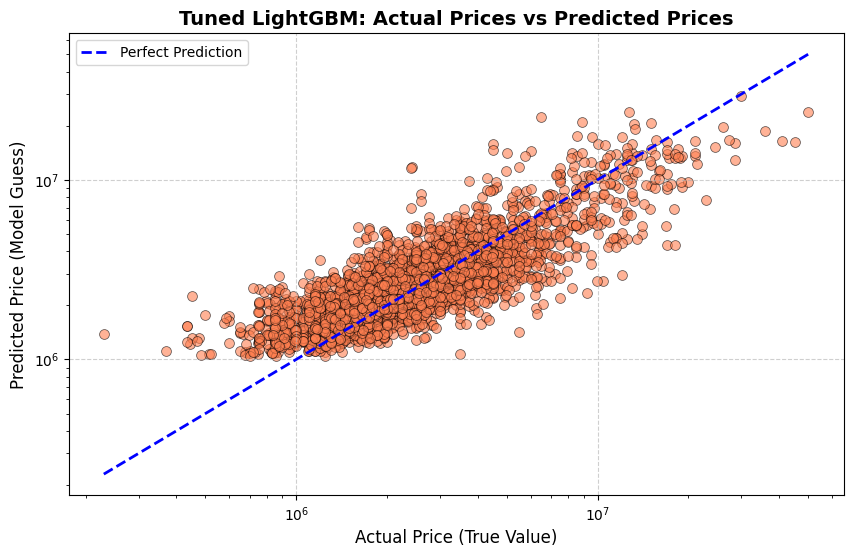

In [65]:
print("-" * 30)
print("Best Parameters Found:")
print(grid_search4.best_params_)
print("-" * 30)

best_lgbm_hybrid = grid_search4.best_estimator_
evaluate_model(best_lgbm_hybrid, X2_test, y2_test,X2_train,y2_train, "Tuned LightGBM")

#### Final notes on training the models


--- Evaluation for CatBoost Regressor on Categorical Dataset ---

Training Score:  0.8351588444362967
R² Score (Accuracy):  68.94%
MAE (Avg Error):      775,130 TL
RMSE (Large Error):   1,634,233 TL


--- Evaluation for Tuned LightGBM ---

Training Score:  0.7487222893787235
R² Score (Accuracy):  65.27%
MAE (Avg Error):      856,397 TL
RMSE (Large Error):   1,728,076 TL



the best is catBoost but it has an overfitting problem, while LightGBM have less accurcy it does not have an overfitting problem